<a href="https://colab.research.google.com/github/ssyss-513/MyColab/blob/main/COMP5434/5434_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Earthquake Alert Level Prediction
Full 5-Step Analytical Process: Acquire, Prepare, Analyze, Report, Act
Author: ChatGPT (Custom Implementation)
"""

# ==============================
# Step 1: Acquire Êï∞ÊçÆËé∑Âèñ
# ==============================
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("train.csv")

print("‚úÖ Data Loaded Successfully!")
print(df.head(), "\n")
print(df.info(), "\n")

‚úÖ Data Loaded Successfully!
   id  magnitude  depth  cdi  mmi  sig  label
0   1        6.9     25    4    4  -33      0
1   2        7.0    579    3    3  -13      0
2   3        6.6    624    0    2  -98      0
3   4        6.8    630    1    3  -57      0
4   5        6.7     20    7    6   29      0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         909 non-null    int64  
 1   magnitude  909 non-null    float64
 2   depth      909 non-null    int64  
 3   cdi        909 non-null    int64  
 4   mmi        909 non-null    int64  
 5   sig        909 non-null    int64  
 6   label      909 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 49.8 KB
None 



/tmp/ipython-input-186105759.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-186105759.py:17: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


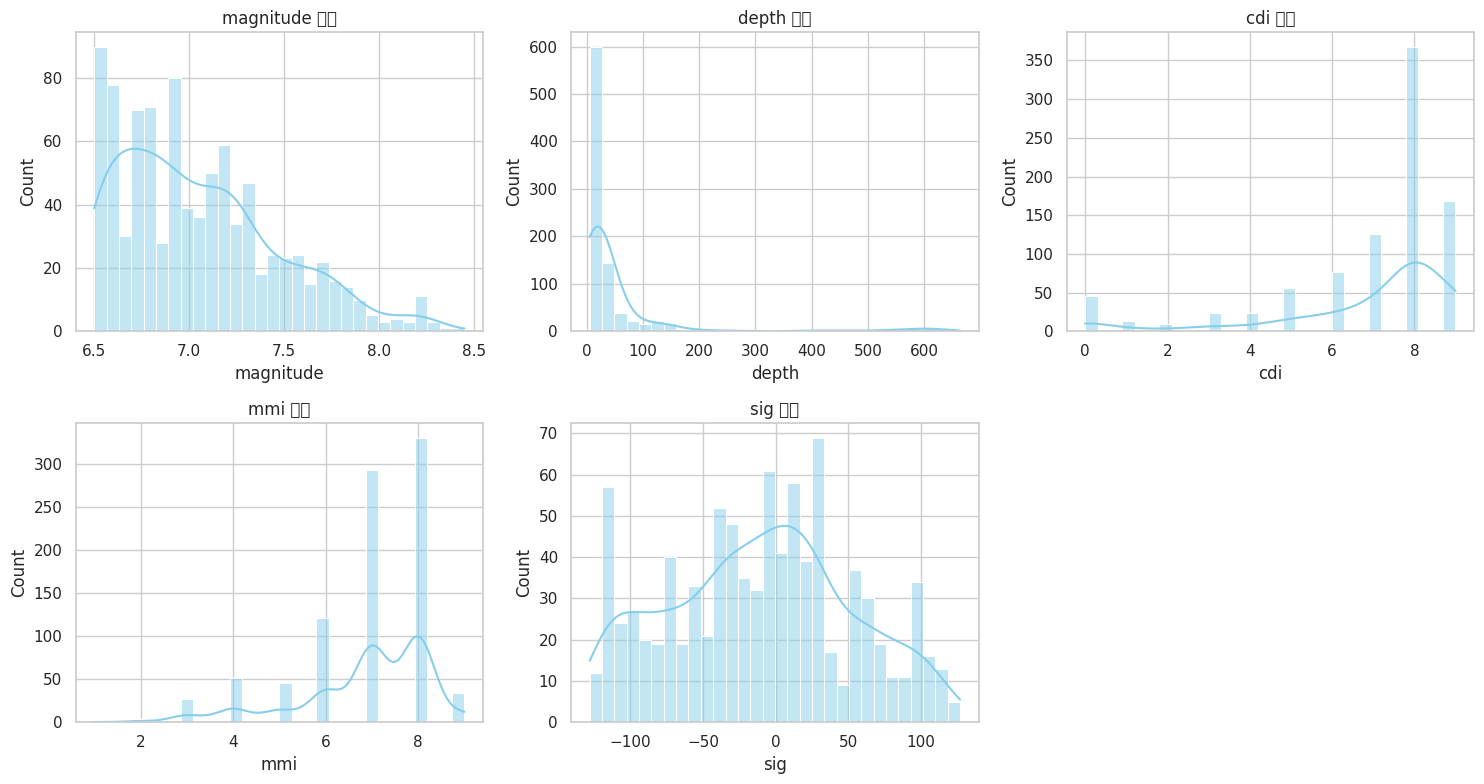

/tmp/ipython-input-186105759.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')
/tmp/ipython-input-186105759.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')
/tmp/ipython-input-186105759.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df, palette='Set2')
/tmp/ipython-input-186105759.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

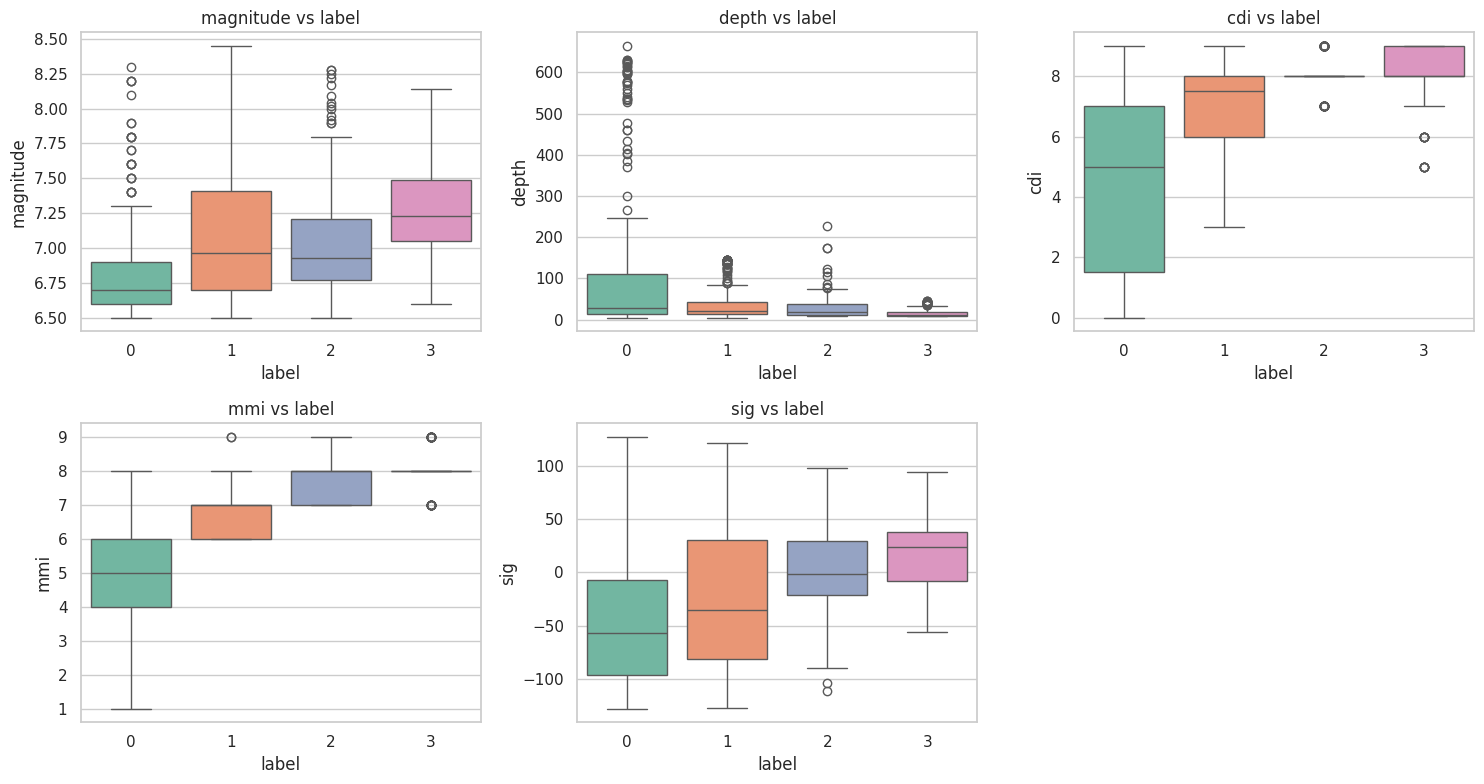

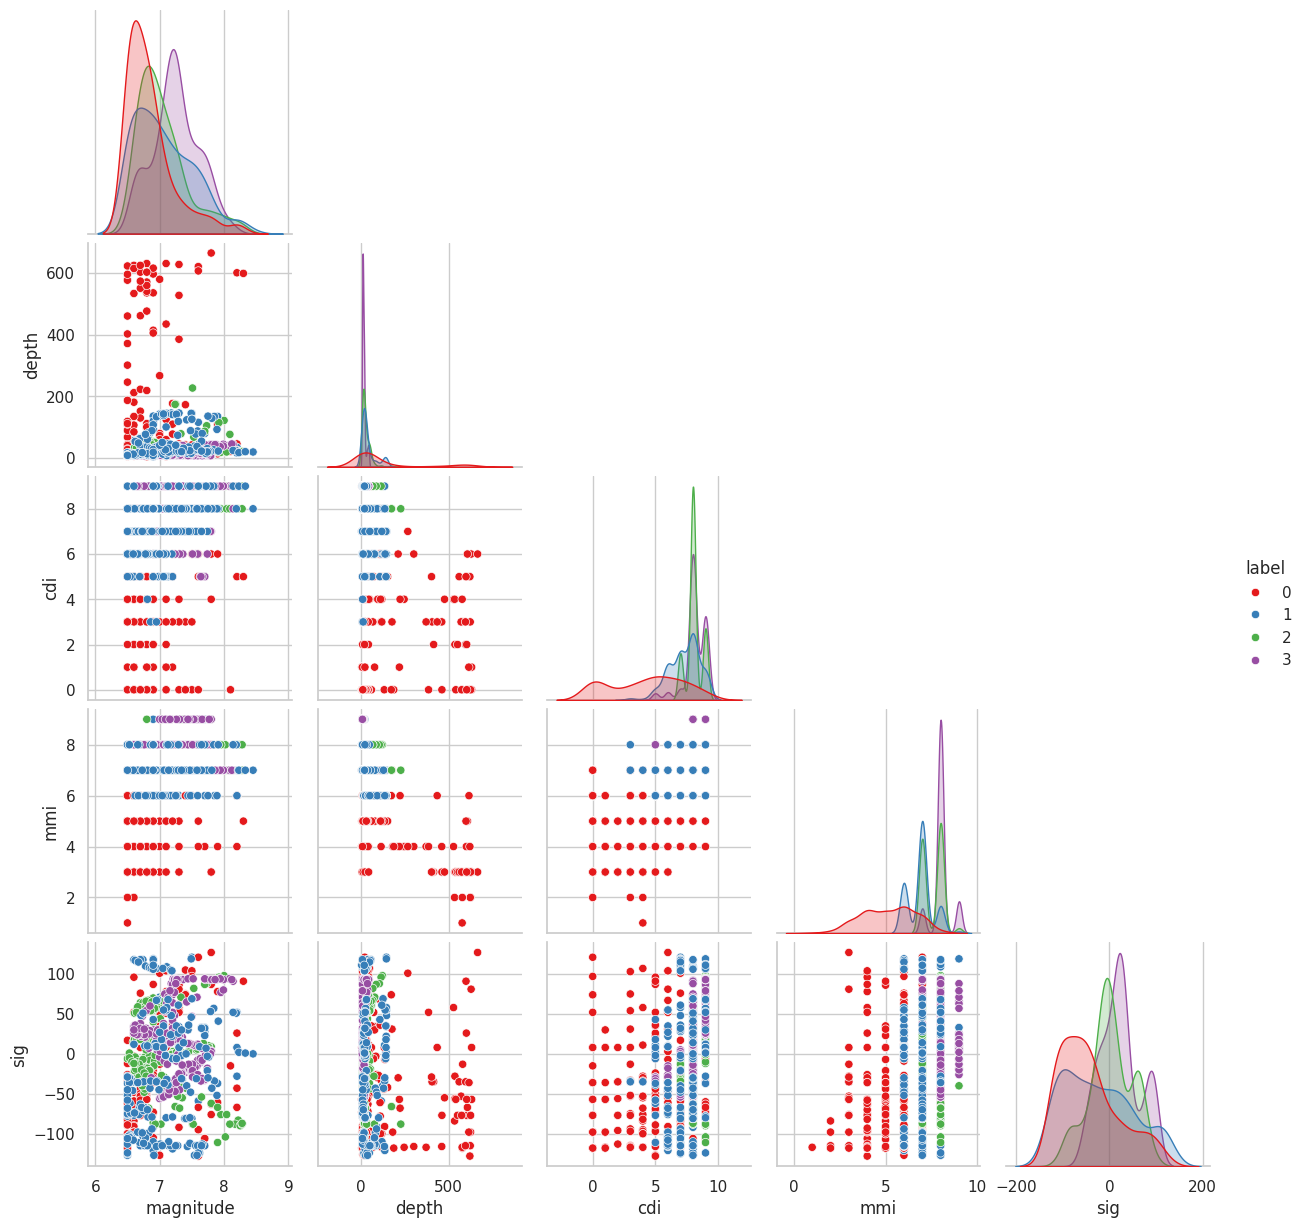

In [21]:
# ===== ÂØºÂÖ•Â∫ì =====
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆÈ£éÊ†º
sns.set(style="whitegrid")

# ÁâπÂæÅÂàóË°®ÔºàÊéíÈô§ id Âíå labelÔºâ
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

# 1Ô∏è‚É£ ÊØèÂàóÁâπÂæÅÁöÑÁõ¥ÊñπÂõæ
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} ÂàÜÂ∏É')
plt.tight_layout()
plt.show()

# 2Ô∏è‚É£ ÊØèÂàóÁâπÂæÅ‰∏é label ÁöÑÁÆ±ÂûãÂõæ
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs label')
plt.tight_layout()
plt.show()

# 3Ô∏è‚É£ ÁâπÂæÅ‰∏é label ÁöÑÊï£ÁÇπÂõæÁü©ÈòµÔºàpairplotÔºâ
sns.pairplot(df, vars=features, hue='label', palette='Set1', corner=True)
plt.show()


In [57]:
from scipy import stats
# Âà†Èô§ÂºÇÂ∏∏ÂÄº
# ÂÅáËÆæ‰Ω†ÁöÑÊï∞ÊçÆÈõÜÊòØ dfÔºå‰∏îÁâπÂæÅÂàóÂ¶Ç‰∏ãÔºö
feature_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

# ËÆ°ÁÆó Z-score
z_scores = np.abs(stats.zscore(df[feature_cols]))

# ËÆæÁΩÆÈòàÂÄº
threshold = 3

# ÊâæÂá∫ÂºÇÂ∏∏ÂÄºÔºàËøîÂõûÂ∏ÉÂ∞îÁü©ÈòµÔºâ
outliers = (z_scores > threshold)

# ÁªüËÆ°ÊØèÂàóÂºÇÂ∏∏ÂÄºÊï∞Èáè
outlier_counts = np.sum(outliers, axis=0)
print("ÊØè‰∏™ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄºÊï∞ÈáèÔºö")
for col, count in zip(feature_cols, outlier_counts):
    print(f"{col}: {count}")

# Âà†Èô§ÂåÖÂê´ÂºÇÂ∏∏ÂÄºÁöÑÊ†∑Êú¨ÔºàÂ¶ÇÊûúÊüêË°å‰ªªÊÑèÂàóÊòØÂºÇÂ∏∏ÂÄºÔºâ
df_cleaned = df[(z_scores < threshold).all(axis=1)]

print(f"\nÂéüÂßãÊ†∑Êú¨Êï∞: {len(df)}, Ê∏ÖÊ¥óÂêéÊ†∑Êú¨Êï∞: {len(df_cleaned)}")
print(f"ÂÖ±Âà†Èô§ {len(df) - len(df_cleaned)} ‰∏™ÂºÇÂ∏∏Ê†∑Êú¨")

# Êü•ÁúãÊ∏ÖÊ¥óÂêéÊï∞ÊçÆÂü∫Êú¨ÊÉÖÂÜµ
print("\n‚úÖ Ê∏ÖÊ¥óÂêéÊï∞ÊçÆÈ¢ÑËßàÔºö")
print(df_cleaned.head())

ÊØè‰∏™ÁâπÂæÅÁöÑÂºÇÂ∏∏ÂÄºÊï∞ÈáèÔºö
magnitude: 2
depth: 36
cdi: 0
mmi: 5
sig: 0

ÂéüÂßãÊ†∑Êú¨Êï∞: 909, Ê∏ÖÊ¥óÂêéÊ†∑Êú¨Êï∞: 871
ÂÖ±Âà†Èô§ 38 ‰∏™ÂºÇÂ∏∏Ê†∑Êú¨

‚úÖ Ê∏ÖÊ¥óÂêéÊï∞ÊçÆÈ¢ÑËßàÔºö
   id  magnitude  depth  cdi  mmi  sig  label
0   1        6.9     25    4    4  -33      0
4   5        6.7     20    7    6   29      0
5   6        7.6     26    9    8    7      1
6   7        6.9     10    9    9  119      1
7   8        6.5     10    7    7  -12      0


In [58]:
corr = df.corr()['label'].abs().sort_values(ascending=False)
print(corr)

label        1.000000
mmi          0.749104
cdi          0.610180
id           0.430429
sig          0.395159
depth        0.345300
magnitude    0.315328
Name: label, dtype: float64


In [61]:
# ==============================
# Step 2: Prepare Êï∞ÊçÆÂáÜÂ§á
# ==============================
from sklearn.preprocessing import StandardScaler
# ÊûÑÈÄ†ÁªÑÂêàÁâπÂæÅ

df_cleaned['mag_depth'] = df_cleaned['magnitude'] * df_cleaned['depth']  # magnitude √ó depth
df_cleaned['cdi_mmi'] = df_cleaned['cdi'] + df_cleaned['mmi']          # cdi + mmi

# Âà†Èô§Êó†ÂÖ≥Âàó
X = df_cleaned.drop(columns=["id", "label"]).values
y = df_cleaned["label"].values


# ÊâãÂä®ÂàíÂàÜËÆ≠ÁªÉÈõÜ(70%)„ÄÅÈ™åËØÅÈõÜ(10%)„ÄÅÊµãËØïÈõÜ(20%)
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

n_train = int(0.7 * len(X))
n_valid = int(0.1 * len(X))

train_idx = indices[:n_train]
valid_idx = indices[n_train:n_train + n_valid]
test_idx  = indices[n_train + n_valid:]

X_train, X_valid, X_test = X[train_idx], X[valid_idx], X[test_idx]
y_train, y_valid, y_test = y[train_idx], y[valid_idx], y[test_idx]

# Ê†áÂáÜÂåñ
# ===== ÁâπÂæÅÊ†áÂáÜÂåñ =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("‚úÖ Data prepared: train/valid/test =", len(X_train), "/", len(X_valid), "/", len(X_test))


‚úÖ Data prepared: train/valid/test = 609 / 87 / 175


/tmp/ipython-input-3553850120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['mag_depth'] = df_cleaned['magnitude'] * df_cleaned['depth']  # magnitude √ó depth
/tmp/ipython-input-3553850120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cdi_mmi'] = df_cleaned['cdi'] + df_cleaned['mmi']          # cdi + mmi


In [62]:
from sklearn.decomposition import PCA
# ===== PCA ÈôçÁª¥ =====
# n_components ÂèØ‰ª•Ê†πÊçÆÁªèÈ™åÈÄâÂèñÔºåÊØîÂ¶Ç 95% ÊñπÂ∑ÆËß£ÈáäÁéá
pca = PCA(n_components=0.95)  # ‰øùÁïô95%ÊñπÂ∑Æ
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [64]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

class CustomKNN:
    def __init__(self, k=7, feature_weights=None, distance_weighted=True):
        """
        k: ÈÇªÂ±ÖÊï∞Èáè
        feature_weights: np.array, ÊØè‰∏™ÁâπÂæÅÁöÑÊùÉÈáç
        distance_weighted: ÊòØÂê¶‰ΩøÁî®Ë∑ùÁ¶ªÂä†ÊùÉÊäïÁ•®
        """
        self.k = k
        self.feature_weights = feature_weights
        self.distance_weighted = distance_weighted

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        # Â¶ÇÊûúÊ≤°ÊúâÊèê‰æõÁâπÂæÅÊùÉÈáçÔºåÈªòËÆ§‰∏∫1
        w = self.feature_weights if self.feature_weights is not None else np.ones(self.X_train.shape[1])

        for x in X:
            # Âä†ÊùÉÊ¨ßÊ∞èË∑ùÁ¶ª
            distances = np.sqrt(((self.X_train - x)**2 * w).sum(axis=1))
            nearest_idx = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_idx]

            if self.distance_weighted:
                # Ë∑ùÁ¶ªÂä†ÊùÉÊäïÁ•®ÔºåÂπ≥ÊªëÂ§ÑÁêÜ
                weights = 1 / (distances[nearest_idx] + 1.0)
                scores = {}
                for lbl, wt in zip(nearest_labels, weights):
                    scores[lbl] = scores.get(lbl, 0) + wt
                preds.append(max(scores, key=scores.get))
            else:
                # ÊôÆÈÄöÂ§öÊï∞ÊäïÁ•®
                vals, counts = np.unique(nearest_labels, return_counts=True)
                preds.append(vals[np.argmax(counts)])
        return np.array(preds)


def find_best_k(X, y, k_candidates=None, feature_weights=None, distance_weighted=True, cv=5):
    if k_candidates is None:
        k_candidates = list(range(3, 21, 2))

    best_k = k_candidates[0]
    best_score = 0
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    print("KÂÄº\tMacro-F1")
    for k in k_candidates:
        scores = []
        for train_idx, val_idx in skf.split(X, y):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            knn = CustomKNN(k=k, feature_weights=feature_weights, distance_weighted=distance_weighted)
            knn.fit(X_train_fold, y_train_fold)
            y_pred_fold = knn.predict(X_val_fold)

            score = f1_score(y_val_fold, y_pred_fold, average='macro')
            scores.append(score)
        mean_score = np.mean(scores)
        print(f"{k}\t{mean_score:.4f}")

        if mean_score > best_score:
            best_score = mean_score
            best_k = k

    print(f"\nÊúÄ‰Ω≥ K: {best_k}, ÂØπÂ∫î Macro-F1: {best_score:.4f}")
    return best_k


# ===== ‰ΩøÁî®Á§∫‰æã =====
# ÁâπÂæÅÈ°∫Â∫è ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
feature_weights = np.array([0.1, 0.1, 1.5, 1.5, 1.5, 1 ,1])  # ÂØπ label Âå∫ÂàÜÂäõÂº∫ÁöÑÁâπÂæÅÊùÉÈáçÊõ¥È´ò

k_candidates = list(range(1, 21, 2))  # Â∞ùËØï K=3,5,...19
best_k = find_best_k(X_train_scaled, y_train, k_candidates=k_candidates,
                     feature_weights=feature_weights, distance_weighted=True, cv=5)

# Áî®ÊúÄ‰Ω≥ K ËÆ≠ÁªÉÊúÄÁªàÊ®°Âûã
knn = CustomKNN(k=best_k, feature_weights=feature_weights, distance_weighted=True)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


KÂÄº	Macro-F1
1	0.8686
3	0.8517
5	0.8235
7	0.8081
9	0.7912
11	0.7860
13	0.7750
15	0.7662
17	0.7549
19	0.7453

ÊúÄ‰Ω≥ K: 1, ÂØπÂ∫î Macro-F1: 0.8686


# **ÈöèÊú∫Ê£ÆÊûó**

ÂÆö‰πâÂÜ≥Á≠ñÊ†ëÂíåÊ£ÆÊûó

In [40]:
# @title
from collections import Counter

# ===== ÂçïÊ£µÂÜ≥Á≠ñÊ†ë =====
class DecisionTreeNode:
    def __init__(self, depth=0, max_depth=None, min_samples_split=2, feature_weights=None):
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.feature_weights = feature_weights

        self.feature_idx = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None

    def fit(self, X, y):
        # Â¶ÇÊûúÊ†∑Êú¨Â§™Â∞ëÊàñËææÂà∞ÊúÄÂ§ßÊ∑±Â∫¶ÔºåËÆæÁΩÆÂè∂ËäÇÁÇπ
        if len(np.unique(y)) == 1 or len(y) < self.min_samples_split or (self.max_depth is not None and self.depth >= self.max_depth):
            self.label = Counter(y).most_common(1)[0][0]
            return

        n_samples, n_features = X.shape
        best_gini = 1.0
        best_idx = None
        best_thr = None

        # ÈöèÊú∫ÈÄâÊã© sqrt(n_features) ‰∏™ÁâπÂæÅ
        feature_indices = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)

        for idx in feature_indices:
            thresholds = np.unique(X[:, idx])
            for thr in thresholds:
                left_mask = X[:, idx] <= thr
                right_mask = X[:, idx] > thr
                if sum(left_mask) == 0 or sum(right_mask) == 0:
                    continue

                # Gini ÊåáÊï∞ÔºåÂä†ÂÖ•ÁâπÂæÅÊùÉÈáç
                left_weight = self.feature_weights[idx] if self.feature_weights is not None else 1.0
                right_weight = self.feature_weights[idx] if self.feature_weights is not None else 1.0

                gini_left = 1 - sum((np.sum(y[left_mask] == c)/sum(left_mask))**2 for c in np.unique(y))
                gini_right = 1 - sum((np.sum(y[right_mask] == c)/sum(right_mask))**2 for c in np.unique(y))
                gini = (sum(left_mask)*gini_left*left_weight + sum(right_mask)*gini_right*right_weight) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = thr

        if best_idx is None:
            self.label = Counter(y).most_common(1)[0][0]
            return

        self.feature_idx = best_idx
        self.threshold = best_thr

        left_mask = X[:, best_idx] <= best_thr
        right_mask = X[:, best_idx] > best_thr

        self.left = DecisionTreeNode(depth=self.depth+1, max_depth=self.max_depth,
                                     min_samples_split=self.min_samples_split,
                                     feature_weights=self.feature_weights)
        self.left.fit(X[left_mask], y[left_mask])

        self.right = DecisionTreeNode(depth=self.depth+1, max_depth=self.max_depth,
                                      min_samples_split=self.min_samples_split,
                                      feature_weights=self.feature_weights)
        self.right.fit(X[right_mask], y[right_mask])

    def predict_one(self, x):
        if self.label is not None:
            return self.label
        if x[self.feature_idx] <= self.threshold:
            return self.left.predict_one(x)
        else:
            return self.right.predict_one(x)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


# ===== ÈöèÊú∫Ê£ÆÊûó =====
class RandomForestCustom:
    def __init__(self, n_trees=50, max_depth=None, min_samples_split=2, feature_weights=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.feature_weights = feature_weights
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.trees = []
        for _ in range(self.n_trees):
            # bootstrap ÊäΩÊ†∑
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = DecisionTreeNode(max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split,
                                    feature_weights=self.feature_weights)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # ÊØèÊ£µÊ†ëÈ¢ÑÊµãÁªìÊûú
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Â§öÊï∞ÊäïÁ•®
        y_pred = []
        for i in range(X.shape[0]):
            counts = Counter(tree_preds[:, i])
            y_pred.append(counts.most_common(1)[0][0])
        return np.array(y_pred)

In [53]:
# @title
def cross_val_predict_rf_custom(X_train, y_train, X_test, n_splits=5, n_trees=50, max_depth=6, feature_weights=None):
    """
    Âú®ËÆ≠ÁªÉÈõÜ‰∏äÂÅö Stratified K-FoldÔºåÊØèÊäòËÆ≠ÁªÉ‰∏ÄÊ£µÈöèÊú∫Ê£ÆÊûóÔºå
    ÂØπÊµãËØïÈõÜÈ¢ÑÊµãÊó∂‰ΩøÁî®ÊâÄÊúâÊäòÊ®°ÂûãÁöÑÂ§öÊï∞ÊäïÁ•®„ÄÇ
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold_scores = []
    test_preds_all = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # ËÆ≠ÁªÉËá™ÂÆûÁé∞ÈöèÊú∫Ê£ÆÊûó
        rf = RandomForestCustom(n_trees=n_trees, max_depth=max_depth, feature_weights=feature_weights)
        rf.fit(X_tr, y_tr)

        # È™åËØÅÈõÜ Macro-F1
        y_val_pred = rf.predict(X_val)
        score = f1_score(y_val, y_val_pred, average='macro')
        fold_scores.append(score)
        print(f"Fold {fold} Macro-F1: {score:.4f}")

        # ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúÂ≠òÂÇ®
        test_preds_all.append(rf.predict(X_test))

    mean_cv_score = np.mean(fold_scores)
    print(f"\nËÆ≠ÁªÉÈõÜÂπ≥Âùá Macro-F1: {mean_cv_score:.4f}")

    # ÂØπÊµãËØïÈõÜÂÅöÂ§öÊï∞ÊäïÁ•®
    test_preds_all = np.array(test_preds_all)  # shape: (n_folds, n_test)
    y_test_pred = []
    for i in range(X_test.shape[0]):
        votes = Counter(test_preds_all[:, i])
        y_test_pred.append(votes.most_common(1)[0][0])
    y_test_pred = np.array(y_test_pred)

    return y_test_pred, mean_cv_score

In [ ]:
# @title
# ===== ‰ΩøÁî®Á§∫‰æã =====
# ÁâπÂæÅÈ°∫Â∫è ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
feature_weights = np.array([1.5, 1.0, 2.0, 1.5, 1.0])

# ÂØπÊµãËØïÈõÜÂÅö CV Â§öÊ®°ÂûãÈ¢ÑÊµã
y_test_pred, mean_cv_score = cross_val_predict_rf_custom(
    X_train_scaled, y_train, X_test_scaled,
    n_splits=5, n_trees=50, max_depth=6, feature_weights=feature_weights
)

# ËÆ°ÁÆóÊµãËØïÈõÜ Macro-F1
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
print(f"\nÊµãËØïÈõÜ Macro-F1: {f1_macro_test:.4f}")


üéØ Macro-F1 Score: 0.8514

üìä Classification Report:
              precision    recall  f1-score   support

           0      0.889     0.727     0.800        44
           1      0.792     0.840     0.816        50
           2      0.838     0.912     0.873        34
           3      0.898     0.936     0.917        47

    accuracy                          0.851       175
   macro avg      0.854     0.854     0.851       175
weighted avg      0.854     0.851     0.850       175


Confusion Matrix:
 [[32  9  2  1]
 [ 4 42  2  2]
 [ 0  1 31  2]
 [ 0  1  2 44]]


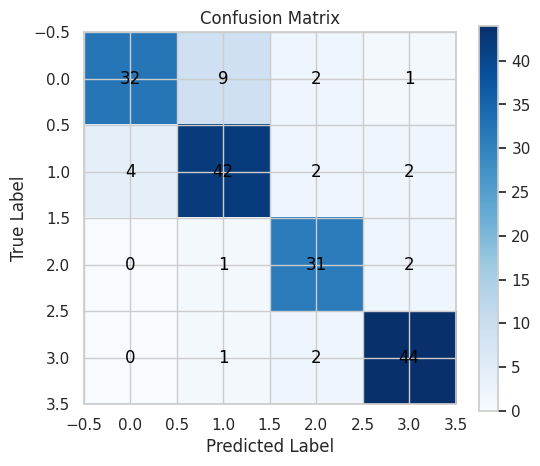

In [65]:
# ==============================
# Step 4: Report Ê®°ÂûãËØÑ‰º∞
# ==============================

macro_f1 = f1_score(y_test, y_pred, average="macro")
print("\nüéØ Macro-F1 Score:", round(macro_f1, 4))

print("\nüìä Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ÂèØËßÜÂåñÊ∑∑Ê∑ÜÁü©Èòµ
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.show()
